<a href="https://colab.research.google.com/github/rashelmia/Bangla-Short-Story-Categorization/blob/main/CNN_LSTM_for_Bangla_short_story_categorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/cleaned_dataset.csv')

In [ ]:
df

,Title,Author,Text,Category,Clean_Text
0,❤তোর মতো কেউ নেই ❤...পর্ব ৭,রিমা ব্যানার্জি 🍁✒,❤ পর্ব ৭❤ বাড়িতে পুজো আছে anniversary ...,2,পর্ব বাড়িতে পুজো টিয়া বলেছিল মাথায় রেখেই রুদ্র...
1,বড় হওয়ার গপ্পো,গৌরব বিশ্বাস,এ গল্প আমার বড় হওয়ার গল্প। পাঠকগ্ণ নিশ্...,1,গল্প বড় হওয়ার গল্প । পাঠকগ্ণ নিশ্চই টানটান হয়ে...
2,রমেশের ডেলিভারি,সুজিত ঘোষ,টিং-টং করে দরজার বেল বাজালাম!ওপার থেকে আ...,0,টিংটং দরজার বেল বাজালামওপার আওয়াজ বললাম রমেশকি...
3,Your_Love_Is_My_Addiction💖 part--- 12,"মানাই ঘোষ ""তিথি""",Your _Love_Is_My_Addiction💖 part--- 12 . ...,1,মিহুর বাবামার বিদায় গেলো মেঘ । মেঘের ঠোঁটের কো...
4,♥️রোমান্টিক বসের ভালোবাসা ♥️,💞রিধি সেন💞,গল্প : রোমান্টিক 😍বসের ভালোবাসা পর্ব : ...,1,গল্প রোমান্টিক বসের ভালোবাসা পর্ব তানিয়া উফএই ...
...,...,...,...,...,...
5806,ডায়েরির শেষ পাতাটা পর্ব-৩২,"Sadia Afrin ""Sarah""",""""""" দুটা ক্লাস করিয়েই ছুটি দিয়ে দেওয...",2,দুটা ক্লাস করিয়েই ছুটি । স্টুডেন্ট কোটা একটা ...
5807,The White Eyes- End of A journey.,Akash Chatterjee,The White Eyes - End of A journey (এই ...,0,গল্প পড়ার আগের অংশ আপনাদের পড়তে নাহলে বুঝতে ...
5808,ফেরা,মধুমিতা মুখার্জী,বহুদিন হল বর্দ্ধমানের দেশের বাড়ির কালি প...,0,বহুদিন বর্দ্ধমানের দেশের বাড়ির কালি পুজোয় যায়ন...
5809,খোপ থেকে বেরলো পোপ,Sudip Chakraborty,আপনাদের কি কারো স্মরণে আছে কোলকাতায় আশির...,1,আপনাদের কারো স্মরণে কোলকাতায় আশির দশকে এক সময়ে...


In [ ]:
pd.value_counts(df.Category)

2    2000
1    2000
0    1811
Name: Category, dtype: int64

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)

In [ ]:
set(df.Category)


{0, 1, 2}

In [ ]:
# Drop rows with missing values
model_f = df.dropna()
print(model_f.shape[0])

5811


2    2000
1    2000
0    1811
Name: Category, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


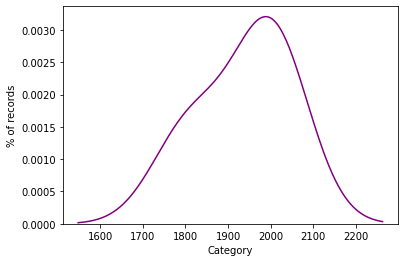

In [ ]:
# Look at classification type counts
counts = model_f.Category.value_counts()
print(counts)
#plot counts
plt.figure()
sns.distplot(counts, hist = False, color = 'purple')
plt.ylabel('% of records')
plt.show()

In [ ]:
max_length=model_f["Clean_Text"].str.len().max()
print(max_length)

29119


In [ ]:
model_f.head()

,Title,Author,Text,Category,Clean_Text
0,রক্তপিশাচ( অন্তিম পর্ব),Ghost Detective,ক্রমে রাত গভীর থেকে গভীরতর হতে লাগলো। আ...,0,ক্রমে রাত গভীর গভীরতর লাগলো । আকাশের চাঁদটা অন...
1,আমারো পরাণ যাহা চায় পর্ব ২৫,"🍁কলির ""চুপকথা""🍂🖋️",পর্ব ২৫ একদিন পরেই ওরা ফিরে এল।অঞ্জলিকে ...,2,পর্ব একদিন । অঞ্জলিকে বাড়িতে ছেড়ে আদি বাড়ি ...
2,🥰 তা বলে কী প্রেম দেবো না 🥰 Part 24,আমি আমার মতো শ্রে য় সী,দুজনেই দুজনকে ছেড়ে আবার পাশাপাশি দুটো ...,1,দুজনেই দুজনকে ছেড়ে পাশাপাশি পাথরে । রিম ব্রত ...
3,BEFIKRE - PART 3,"আরোহী ""রূপকথা""","নীল - "" দার্জিলিং ?"" রণ - "" মম হ...",1,নীল দার্জিলিং রণ মম হুঁ গ্যাংটক ঋত চলনা ভাই কর...
4,বহিরাগত (প্রথম পর্ব),Niloy Dey,"সেদিনটা এইরকমই একটা বর্ষামুখোর দিন ছিল ,...",0,সেদিনটা এইরকমই একটা বর্ষামুখোর যেদিন ঘটনাটা লি...


In [ ]:
train=model_f
a=train.Category.unique()
l=len(a)
print(a)

[0 2 1]


In [ ]:
train.Category.head()

0    0
1    2
2    1
3    1
4    0
Name: Category, dtype: int64

In [ ]:
df = train
df.Category = df.Category.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.layers import SpatialDropout1D
#from keras.utils import to_categorical
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import Dropout
from keras.layers import Bidirectional
from keras.layers import GlobalMaxPool1D
#from keras.utils import plot_model
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping
from sklearn.feature_selection import RFE
import re

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~।', lower=False)
tokenizer.fit_on_texts(df.Clean_Text.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 277039 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df.Clean_Text .values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (5811, 250)


In [ ]:
Y = pd.get_dummies(df.Category).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (5811, 3)


In [ ]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=.10)

In [ ]:
from keras.layers import MaxPooling1D


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(Conv1D(filters=64, kernel_size=5, padding='causal', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.7))
model.add(LSTM(150))
model.add(Dropout(0.7))
model.add(Dense(l, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 250, 100)          5000000   
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 250, 64)           32064     
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 125, 64)           0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 125, 64)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 150)               129000    
_________________________________________________________________
dropout_11 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

In [ ]:
epochs = 10
batch_size = 128

In [ ]:
history = model.fit(train_features, train_labels, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
37/37 [==============================] - 31s 756ms/step - loss: 1.0964 - accuracy: 0.3539 - val_loss: 1.0742 - val_accuracy: 0.3403
Epoch 2/10
37/37 [==============================] - 27s 736ms/step - loss: 0.9551 - accuracy: 0.5037 - val_loss: 0.7072 - val_accuracy: 0.6577
Epoch 3/10
37/37 [==============================] - 27s 736ms/step - loss: 0.5075 - accuracy: 0.7826 - val_loss: 1.0939 - val_accuracy: 0.7591
Epoch 4/10
37/37 [==============================] - 27s 734ms/step - loss: 0.3284 - accuracy: 0.9132 - val_loss: 0.5289 - val_accuracy: 0.8145
Epoch 5/10
37/37 [==============================] - 27s 732ms/step - loss: 0.1108 - accuracy: 0.9697 - val_loss: 0.5127 - val_accuracy: 0.8184
Epoch 6/10
37/37 [==============================] - 27s 737ms/step - loss: 0.0763 - accuracy: 0.9800 - val_loss: 0.4780 - val_accuracy: 0.8470
Epoch 7/10
37/37 [==============================] - 27s 728ms/step - loss: 0.0730 - accuracy: 0.9805 - val_loss: 0.5233 - val_accuracy: 0.8642

In [ ]:
accr = model.evaluate(test_features,test_labels)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

19/19 [==============================] - 1s 56ms/step - loss: 0.5210 - accuracy: 0.8419
Test set
  Loss: 0.521
  Accuracy: 0.842


In [ ]:
from google.colab import files

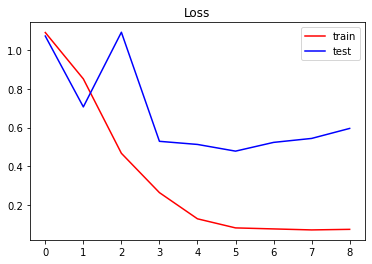

In [ ]:
from matplotlib import pyplot as plt
plt.title('Loss')
plt.plot(history.history['loss'],'r', label='train')
plt.plot(history.history['val_loss'],'b', label='test')
plt.legend()
plt.savefig('plot_loss.png',dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
files.download("plot_loss.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

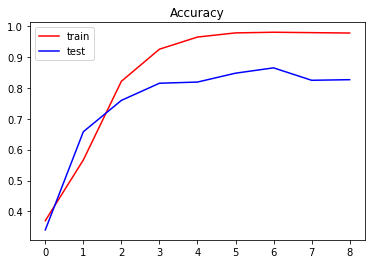

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'],'r', label='train')
plt.plot(history.history['val_accuracy'],'b', label='test')
plt.legend()
plt.savefig('plot_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
files.download("plot_accuracy.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
predicted_classes = model.predict(test_features)
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
#test_Y = np.argmax(np.round(test_labels),axis=1)

In [ ]:
predicted_classes.shape, test_labels.shape
print(test_labels.shape)

(582, 3)


In [ ]:
test_Y=[]
for i in range (582):
    for j in range (3):
        if(test_labels[i][j]==1):
            test_Y.append(j)
print(len(test_Y))

582


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(3)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.90      0.84      0.87       196
     Class 1       0.86      0.79      0.82       190
     Class 2       0.78      0.89      0.83       196

    accuracy                           0.84       582
   macro avg       0.85      0.84      0.84       582
weighted avg       0.85      0.84      0.84       582



In [ ]:
name=[]
for i in range(3):
  name.append(i)


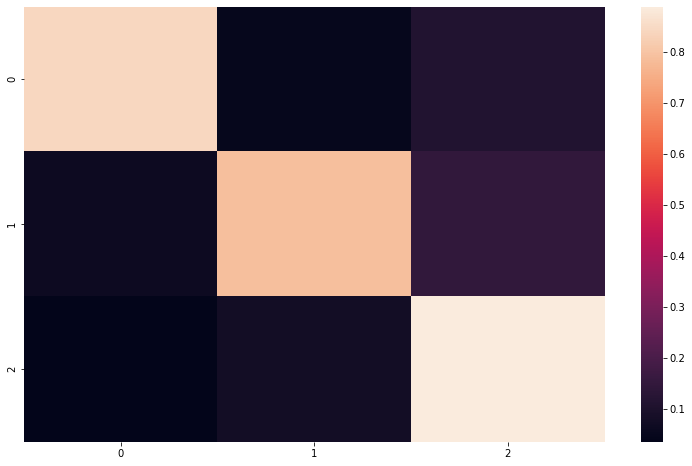

In [ ]:
# Plot confusion matrix
conf_mat = confusion_matrix(test_Y, predicted_classes, labels = name)

#Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

Automatically created module for IPython interactive environment
Confusion matrix, without normalization
[[165   9  22]
 [ 12 150  28]
 [  7  15 174]]
Normalized confusion matrix
[[0.84 0.05 0.11]
 [0.06 0.79 0.15]
 [0.04 0.08 0.89]]


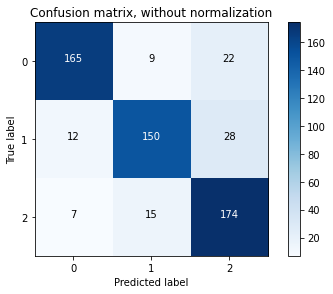

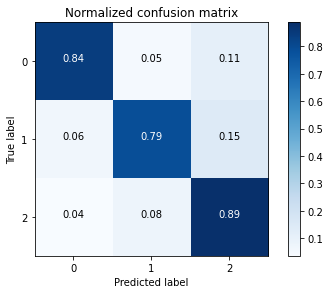

In [ ]:
print(__doc__)

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


class_names = name

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(test_Y, predicted_classes)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
plt.savefig('confussion_matrix_without_normalization.png', dpi=300, bbox_inches='tight')


# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('confussion_matrix_with_normalization.png', dpi=300, bbox_inches='tight')


plt.show()

In [ ]:
files.download("confussion_matrix_without_normalization.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download("confussion_matrix_with_normalization.png") 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>